# Вариант 4. Васильев Максим, 6373.

## Задача 1.

### Текст задачи 

В цехах $N1$ и $N2$ предприятия производится продукт Y, который в дальнейшем используется в качестве исходного материала для производства изделий в цехе $N3$. Суммарная производительность цехов N1 и N2 зависит от вложения дополнительных средств X. При работе цехов N1 и N2 в течение одного месяца эта зависимость может быть приближённо представлена в виде функций:

- $N1: y = 5 + (x + 40)^{1/3}$
- $N2: y = 7 + (x + 30)^{1/3}$

Функции остатка средств в течении месяца:

- $N1: 0.8x$
- $N2: 0.62x$

Средства выделяемые на оба цеха в течении квартала (3 месяца), составляют 179 единиц; перераспределение производится помесячно. 

Требуется распределить средства на планируемый квартал с целью получения максимального количества продукта Y.

### Формализация задачи

Так-как количество управлений невелико, для решения задачи был выбран метод Динамического программирования.Для решения задачи выбранным методом, нужно выбрать способ описания процесса.

#### Способ описания процесса

1. Этапы   - месяца финансирования, $i = 0..2$
2. Выигрыш - суммарная производительность двух цехов, $y = 12 + (x_1 + 40)^{1/3} + (x_2 + 30)^{1/3}$, где $x_1$ - вложерние в первый цех, $x_2$ - вложение во второй цех
3. Управление - количество средств выделенное на первый цех, т.к. на второй цех будет выделена автоматически оставшаяся часть.
4. Состояние - остаток средств в течении месяца, в первом месяце это $179$

#### Описание в терминах уравнения Беллмана

$S_i$ - состояние на $i$-м этапе  
$u_i$ - управление на $i$-м этапе  
$W_i$ - условный оптимальный выигрыш на всех шагах от i-го и до последнего  
$w_i(S_i, u_i)$ - выигрыш на $i$-м этапе  
$\varphi_i(S_i, u_i)$ - изменение состояния системы на i-м шаге  

Запишем выигрыш и изменение состояния на i-м шаге:  
$w_i(S_i, u_i) = 12 + (u_i + 40)^{1/3} + (S_i - u_i + 30)^{1/3}$  
$\varphi_i(S_i, u_i) = 0.8 u_i + 0.66(S_i - u_i)$  

Тогда основное функциональное уравнение будет иметь следующий вид:

$W_i(S_i) = max(12 + (u_i + 40)^{1/3} + (S_i - u_i + 30)^{1/3} + W_{i+1}(0.66S_i + 0.14u_i))$


In [24]:

# Dynamic programming solution

from dynamic_solver import solve, set_precision, construct_plan

set_precision(0.1)
max_y_product = solve(179)

print(f'Maximum y product is {max_y_product}')
print(f'Plan for this count of product is: {construct_plan(179)}')


Maximum y product is 64.02966637551752
Plan for this count of product is: [111.0, 73.8, 44.300000000000004]


## Задача 2.

### Формализация задачи

$f(x) = x_{21} + x_{31} + x_{12} + x_{22} + x_{13} + x_{33} -> max$ 

$x_{ij}, i=1..3, j=1..3$ - количество продукции i произведённое цехом j

*Ограничения по количеству продукции:*  
y1: $0.005x_{21} + 0.004x_{31} +  0.003x_{12} + 0.009x_{22} + 0.003x_{13} + 0.005x_{33} <= Y$, где Y - количество продукции полученное в прошлом пункте.  

*Ограничения по времени:*  

y2: $5 x_{21} + 8 x_{31} <= 860$  

y3: $20 x_{12} + 8 x_{22} <= 1500$  

y4: $13 x_{13} + 9 x_{33} <= 870$  

*Ограничения на равенство производимой продукции:*

$0.003 x_{12} + 0.003x_{13} - 0.005x_{21} - 0.009x_{22} = 0$  
$0.003 x_{12} + 0.003x_{13} - 0.004x_{31} - 0.005x_{33} = 0$  


*Ограничения на отрицательность переменных:*

$x_{21} >= 0$
$x_{31} >= 0$
$x_{12} >= 0$
$x_{22} >= 0$
$x_{13} >= 0$
$x_{33} >= 0$

In [25]:
from cvxopt import matrix, solvers

c = matrix([-1 for _ in range(6)], tc='d')
G = matrix([[0.005, 0.004, 0.003, 0.009, 0.003, 0.005],
            [5, 8, 0, 0, 0, 0],
            [0, 0, 20, 8, 0, 0],
            [0, 0, 0, 0, 13, 9],
            [-1, 0, 0, 0, 0, 0],
            [0, -1, 0, 0, 0, 0],
            [0, 0, -1, 0, 0, 0],
            [0, 0, 0, -1, 0, 0],
            [0, 0, 0, 0, -1, 0],
            [0, 0, 0, 0, 0, -1]], tc='d')

h = matrix([max_y_product, 860, 1500, 870, 0, 0, 0, 0, 0, 0], tc='d')
A = matrix([[-1, 0, 1, -1, 1, 0],
            [0, -1, 1, 0, 1, -1]], tc='d')
b = matrix([0, 0], tc='d')
solution = solvers.lp(c, G.T, h, A.T, b, solver='glpk')

print(f'Status: {solution["status"]}')
print(f'Objective: {-solution["primal objective"]}')
print(f'x = \n{solution["x"]}')

max_product = -solution['primal objective']
shadow_price, reduced_cost = solution['z'][:-len(c)], solution['z'][-len(c):]
print(f'Shadow price=\n{shadow_price}\nReduced cost=\n{reduced_cost}')


Status: optimal
Objective: 309.8868778280543
x = 
[ 6.73e+00]
[ 1.03e+02]
[ 3.64e+01]
[ 9.66e+01]
[ 6.69e+01]
[ 0.00e+00]

Shadow price=
[-0.00e+00]
[ 1.18e-01]
[ 7.35e-02]
[ 1.13e-01]

Reduced cost=
[-0.00e+00]
[-0.00e+00]
[-0.00e+00]
[-0.00e+00]
[-0.00e+00]
[ 7.69e-02]



### Выводы по решению:

1. Ресурс $Y$, производимый цехами $N1$ и $N2$ не является дефицитным.
2. Полностью загружены все группы оборудования, т.к. временной фонд в ограничениях $y2$, $y3$ и $y4$ является дефицитным ресурсом.

In [26]:
from typing import Tuple


def availability_interval(c, G, h, A, b, constraint_index: int) -> Tuple[int, int]:
    """
    Returns solution availability interval for constraint with defined index
    
    :param с: default cvxopt.solvers.lp argument
    :param G: default cvxopt.solvers.lp argument
    :param h: default cvxopt.solvers.lp argument
    :param A: default cvxopt.solvers.lp argument
    :param b: default cvxopt.solvers.lp argument
    :param constraint_index: index of constraint
    :return: availability interval for constraint
    """
    dh = matrix([int(i == constraint_index) for i in range(len(h))], tc='d')
    default_solution = solvers.lp(c, G.T, h, A.T, b, solver='glpk')
    
    price = default_solution['z'][constraint_index]
    prev_z = -default_solution['primal objective']
    
    step = 100
    a = 1
    
    while True:
        solution = solvers.lp(c, G.T, h + dh * a, A.T, b, solver='glpk')
        
        if solution['status'] != 'optimal':
            right_border = h[constraint_index] + a - 1
            break
        
        new_z = -solution['primal objective']
        delta_z = new_z - prev_z 
        prev_z = new_z
                
        if abs(delta_z - price) > 1e-6:
            right_border = h[constraint_index] + a
            break
        
        a += 1
    
    a = 1
    prev_z = -default_solution['primal objective']
    
    while True:
        solution = solvers.lp(c, G.T, h - dh * a, A.T, b, solver='glpk')
        
        if solution['status'] != 'optimal':
            left_border = h[constraint_index] - a + 1
            break
        
        new_z = -solution['primal objective']
        delta_z = prev_z - new_z
        prev_z = new_z
        
        if abs(delta_z - price) > 1e-6:
            left_border = h[constraint_index] - a
            break
        
        a += 1
    
    return left_border, right_border

borders = {}

# Calculate availability interval for all constraints with non-zero shadow price
for constraint_index, price in enumerate(shadow_price):
    if price == 0:
        continue
    print(f'Sensitivity analysis for y{constraint_index + 1} constraint')
    left_border, right_border = availability_interval(c, G, h, A, b, constraint_index)
    borders[constraint_index] = (left_border, right_border)
    print(f'y{constraint_index + 1} availability interval is [{left_border}, {right_border}]')
    print()


Sensitivity analysis for y2 constraint
y2 availability interval is [810.0, 1846.0]

Sensitivity analysis for y3 constraint
y3 availability interval is [15.0, 1672.0]

Sensitivity analysis for y4 constraint
y4 availability interval is [0.0, 982.0]



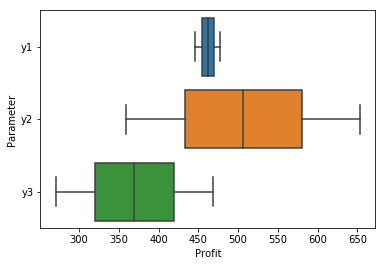

In [27]:
import seaborn as sns
import pandas as pd
from typing import List


def profit_values(c: matrix, G: matrix, h: matrix, constraint_index: int, possible_values: List[float]) -> float:
    """
    Yields values of target function for all possible values for defined constraint 
    
    :param c: default cvxopt.solvers.lp argument
    :param G: default cvxopt.solvers.lp argument
    :param h: default cvxopt.solvers.lp argument
    :param constraint_index: index of constraint that has values
    :param possible_values: possible constraint values
    :return: 
    """
    h_copy = matrix([i for i in h], tc='d')
    
    for value in possible_values:
        h_copy[constraint_index] = value
        yield -solvers.lp(c, G.T, h_copy, solver='glpk')['primal objective']

# Construct all values for borders and plot "tornado" boxplot

results = {
    f'y{constraint_index}': list(profit_values(c, G, h, constraint_index, possible_values))
    for constraint_index, possible_values 
    in borders.items()
}

boxplot_df = pd.DataFrame({
    'Parameter': list(results.keys()) + list(results.keys()),
    'Profit': [value for values in results.values() for value in values],
})

sns.boxplot(data=boxplot_df, x='Profit', y='Parameter')


## Задача 3.

$x_{ij}$, количество перевезённого продукта i в пункт j


$f(x) = 5.1x_{11} + 7.4x_{12} + 7.6x_{13} + 5.3x_{14} + 3.0x_{15} + 5.6x_{21} + 7.4x_{22} + 4.0x_{23} + 7.9x_{24} + 6.6x_{25} + 2.2x_{31} + 4.3x_{32} + 5.7x_{33} + 5.8x_{34} + 6.6x_{35} + 5.1x_{41} + 5.3x_{42} + 3.3x_{43} + 6.7x_{44} + 6.8x_{45}$  

$x_{11} + x_{12} + x_{13} + x_{14} + x_{15} <= 0.67 \cdot prev$  
$x_{21} + x_{22} + x_{23} + x_{24} + x_{25} <= 0.67 \cdot 4400$  
$x_{31} + x_{32} + x_{33} + x_{34} + x_{35} <= 0.67 \cdot 5900$  
$x_{41} + x_{42} + x_{43} + x_{44} + x_{45} <= 0.67 \cdot 4200$  
$x_{51} + x_{52} + x_{53} + x_{54} + x_{55} <= 5579$  
$x_{11} + x_{21} + x_{31} + x_{41} + x_{51} = 1900$  
$x_{12} + x_{22} + x_{32} + x_{42} + x_{52} = 3200$  
$x_{13} + x_{23} + x_{33} + x_{43} + x_{53} = 2900$  
$x_{14} + x_{24} + x_{34} + x_{44} + x_{54} = 4100$  
$x_{15} + x_{25} + x_{35} + x_{45} + x_{55} = 3500$  
$x_{ij} >= 0$


In [28]:
import numpy as np

manufactured = [0.67 * i for i in [max_product, 4400, 5900, 4200]]
required = [1900, 3200, 2900, 4100, 3500]
delta = sum(required) - sum(manufactured)
print(f"Manufactured = {sum(manufactured)}, required = {sum(required)}, delta = {sum(required) - sum(manufactured)}")


c = matrix([5.1, 7.4, 7.6, 5.3, 0, 3.0, 5.6, 7.4, 4.0, 0, 7.9, 6.6, 2.2, 4.3, 0, 5.7, 5.8, 6.6, 5.1, 0, 5.3, 3.3, 6.7, 6.8, 0], tc='d')
G = matrix(-np.eye(25), tc='d')
h = matrix(np.zeros(25), tc='d')

A = matrix([[1, 1, 1, 1, 1,  0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0,  1, 1, 1, 1, 1,  0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  1, 1, 1, 1, 1,  0, 0, 0, 0, 0,  0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  1, 1, 1, 1, 1,  0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  1, 1, 1, 1, 1],
     
            [1, 0, 0, 0, 0,  1, 0, 0, 0, 0,  1, 0, 0, 0, 0,  1, 0, 0, 0, 0,  1, 0, 0, 0, 0],
            [0, 1, 0, 0, 0,  0, 1, 0, 0, 0,  0, 1, 0, 0, 0,  0, 1, 0, 0, 0,  0, 1, 0, 0, 0],
            [0, 0, 1, 0, 0,  0, 0, 1, 0, 0,  0, 0, 1, 0, 0,  0, 0, 1, 0, 0,  0, 0, 1, 0, 0],
            [0, 0, 0, 1, 0,  0, 0, 0, 1, 0,  0, 0, 0, 1, 0,  0, 0, 0, 1, 0,  0, 0, 0, 1, 0],
            [0, 0, 0, 0, 1,  0, 0, 0, 0, 1,  0, 0, 0, 0, 1,  0, 0, 0, 0, 1,  0, 0, 0, 0, 1]], tc='d')

b = matrix([0.67 * max_product,
            0.67 * 4400,
            0.67 * 5900,
            0.67 * 4200,
            delta,
     
            1900,
            3200,
            2900,
            4100,
            3500], tc='d')

transport_solution = solvers.lp(c, G.T, h, A.T, b, solver='glpk')
print(f'Solution status = {transport_solution["status"]}')
print(f'Minimal cost = {transport_solution["primal objective"]}')
print(f'Plan =\n {transport_solution["x"]}')
print(f'Costs =\n {transport_solution["z"]}')

Manufactured = 9922.624208144796, required = 15600, delta = 5677.375791855204
Solution status = optimal
Minimal cost = 41554.8
Plan =
 [ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 2.08e+02]
[ 1.90e+03]
[ 0.00e+00]
[ 0.00e+00]
[ 1.05e+03]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 2.90e+03]
[ 1.05e+03]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 2.00e+03]
[ 8.15e+02]
[ 0.00e+00]
[ 3.20e+03]
[ 0.00e+00]
[ 0.00e+00]
[ 2.48e+03]

Costs =
 [ 1.00e+00]
[ 4.10e+00]
[ 4.60e+00]
[ 2.00e-01]
[-0.00e+00]
[-0.00e+00]
[ 3.40e+00]
[ 5.50e+00]
[-0.00e+00]
[ 1.10e+00]
[ 4.60e+00]
[ 4.10e+00]
[-0.00e+00]
[-0.00e+00]
[ 8.00e-01]
[ 1.60e+00]
[ 2.50e+00]
[ 3.60e+00]
[-0.00e+00]
[-0.00e+00]
[ 1.20e+00]
[-0.00e+00]
[ 3.70e+00]
[ 1.70e+00]
[-0.00e+00]



### Рекомендации по результатам решения задачи

Так как прямая задача не имеет решения, имеется недостаток свыше 15%, была решена задача с фиктивным пунктом отправления.

В пунктах 1, 3 и 4 имеется недостаток в 1.2, 3.7 и 1.7 единиц продукции соответственно. Так как мы оптимизируем конкретно наш завод, то рекомендуется увеличить фонд рабочего времени на любом из полностью загруженных станков, так как интервал допустимости решения предыдущей задачи достаточно велик.


In [29]:
# Sensitivity analysis for target-function coefficients
from typing import Optional


def availability_interval_for_coeffs(
        c, 
        G, 
        h, 
        A, 
        b, 
        coefficient_index: int, 
        increase: bool, 
        delta: float
) -> Optional[float]:
    """
    
    :param c: cvxopt.solvers.lp param
    :param G: cvxopt.solvers.lp param
    :param h: cvxopt.solvers.lp param
    :param A: cvxopt.solvers.lp param
    :param b: cvxopt.solvers.lp param
    :param coefficient_index: target function coefficient index
    :param increase: 
    :param delta: 
    :return: 
    """
    solution = solvers.lp(c, G.T, h, A.T, b, solver='glpk')
    new_c = matrix([i for i in c], tc='d')
    
    if increase:
        # Check for absence of current coefficient index in optimal plan
        if solution["x"][coefficient_index] == 0:
            return
                
        while solution["x"][coefficient_index] > 0:
            new_c[coefficient_index] += delta
            solution = solvers.lp(new_c, G.T, h, A.T, b, solver='glpk')        
    else:
        # Check for presence of current coefficient index in optimal plan
        if solution["x"][coefficient_index] > 0:
            plan_delta = None
            
            while plan_delta != 0:
                new_c[coefficient_index] -= delta
                new_solution = solvers.lp(new_c, G.T, h, A.T, b, solver='glpk')
                plan_delta = new_solution["x"][coefficient_index] - solution["x"][coefficient_index]
                solution = new_solution
        else:
            while solution["x"][coefficient_index] == 0:
                new_c[coefficient_index] -= delta
                solution = solvers.lp(new_c, G.T, h, A.T, b, solver='glpk')
    
    return new_c[coefficient_index] - c[coefficient_index]
    

# Variables change tendencies are defined in following manner
#
# True if variable may increase
# None if variable is stable
# False if variable may decrease

variables_tendencies = [
    True, None, None, None, False,
    None, False, None, True, None,
    None, True, True, False, None,
    True, None, None, None, None,
]

# Output all sensitivity analysis results corresponding to variables tendencies

for index, tendency in enumerate(variables_tendencies):
    variable_name = f'x{index // 5 + 1}{index % 5 + 1}'
    prefix = f'{variable_name} variable'
    
    if tendency is None:
        pass
    
    elif tendency:
        delta = availability_interval_for_coeffs(c, G, h, A, b, index, tendency, 0.1)
        
        if delta is None:
            print(f'{prefix} is out of plan and increases, skipping.')
        else:
            print(f'{prefix} increases, will be out of plan with delta={delta}')
    
    else:
        delta = availability_interval_for_coeffs(c, G, h, A, b, index, tendency, 0.1)
        
        if delta is None:
            print(f'{prefix} decreases and is present in plan, decreasing will be useless with delta={delta}')
        else:
            print(f'{prefix} decreases, will be in plan with delta={delta}')

x11 variable is out of plan and increases, skipping.
x15 variable decreases, will be in plan with delta=-0.1
x22 variable decreases, will be in plan with delta=-3.399999999999996
x24 variable increases, will be out of plan with delta=2.8999999999999897
x32 variable is out of plan and increases, skipping.
x33 variable increases, will be out of plan with delta=4.599999999999992
x34 variable decreases, will be in plan with delta=-0.09999999999999964
x41 variable is out of plan and increases, skipping.
